# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Train_data_agm.csv')
#data = dataset.drop(['Plan_C', 'Prifile_C','Slope','SPI','SCA'], axis=1)

In [3]:
x = dataset.iloc[:, :20].values
y_real = dataset.iloc[:, -2].values
y_class = dataset.iloc[:, -1].values

In [86]:
x

array([[ 5.41e+00,  3.44e+00,  1.62e+02, ..., -1.22e+00,  1.00e+00,
         5.00e+00],
       [ 5.41e+00,  3.42e+00,  1.62e+02, ..., -1.27e+00,  1.00e+00,
         5.00e+00],
       [ 5.40e+00,  3.41e+00,  1.63e+02, ..., -3.51e-01,  1.00e+00,
         5.00e+00],
       ...,
       [ 5.45e+00,  3.37e+00,  5.09e+02, ..., -1.73e+00,  4.00e+00,
         2.00e+00],
       [ 5.47e+00,  3.40e+00,  5.11e+02, ...,  2.97e-01,  4.00e+00,
         2.00e+00],
       [ 5.48e+00,  3.43e+00,  5.12e+02, ...,  1.57e+00,  4.00e+00,
         2.00e+00]])

1    1700
2     950
3     875
4     875
Name: well_M, dtype: int64


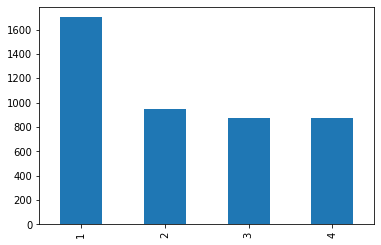

In [4]:
print(pd.value_counts(dataset['well_M']))
pd.value_counts(dataset['well_M']).plot.bar()

### Checking the variation of accuracy with respect to different parameters

1 0.9962121212121212
2 0.9992424242424243
3 0.9992424242424243
4 0.9977272727272727
5 0.996969696969697
6 0.9977272727272727
7 0.9977272727272727
8 0.9992424242424243
9 0.9962121212121212
10 0.9977272727272727
11 0.9992424242424243
12 1.0
13 0.9992424242424243
14 0.9992424242424243
15 0.996969696969697
16 0.9984848484848485
17 0.9984848484848485
18 0.9984848484848485
19 1.0
20 1.0
21 0.9992424242424243
22 0.9984848484848485
23 0.996969696969697
24 0.9984848484848485
25 0.9954545454545455
26 0.9992424242424243
27 0.9977272727272727
28 0.996969696969697
29 0.996969696969697
30 0.996969696969697
31 0.9992424242424243
32 0.9984848484848485
33 0.9984848484848485
34 1.0
35 0.9946969696969697
36 0.9977272727272727
37 0.9992424242424243
38 0.9863636363636363
39 0.9992424242424243
40 0.9992424242424243
41 0.9962121212121212
42 1.0
43 0.9977272727272727
44 0.996969696969697
45 0.996969696969697
46 0.996969696969697
47 0.9992424242424243
48 0.9962121212121212
49 1.0
50 0.996969696969697
51 0.9969

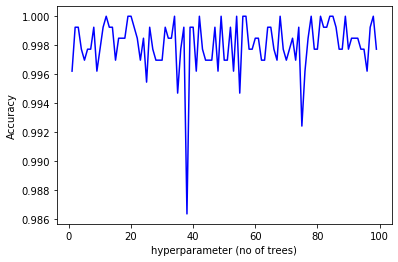

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score
acc = []
for i in range(1,100):
   
        
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size= 0.3, random_state = i)
    classifier = RandomForestClassifier(n_estimators=10 ,random_state = 0)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
    print(i,accuracy_score(y_test, y_pred))

plt.plot(range(1,100),acc, c = 'blue')
plt.xlabel('hyperparameter (no of trees)')
plt.ylabel('Accuracy')
plt.show()

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size= 0.2, random_state = 1)

# Training Random Forest classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10 ,random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Predicting Test Result

In [6]:
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 3]
 [1 1]
 [1 1]
 ...
 [1 1]
 [4 4]
 [3 3]]


# Evaluating accuracy

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,cohen_kappa_score
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(y_test, y_pred)*100))  
print(cr)

k = cohen_kappa_score(y_test, y_pred)
print('kappa: %0.3f'%k)

Confusion Matrix: 

[[345   0   0   1]
 [  0 194   0   0]
 [  0   0 181   0]
 [  1   0   0 158]]

overall Accuracy: 99.77 %
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       346
           2       1.00      1.00      1.00       194
           3       1.00      1.00      1.00       181
           4       0.99      0.99      0.99       159

   micro avg       1.00      1.00      1.00       880
   macro avg       1.00      1.00      1.00       880
weighted avg       1.00      1.00      1.00       880

kappa: 0.997


## Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X = x_train , y = y_train, cv = 10,)

print('Accuracy: {:0.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:0.2f} %'.format(accuracies.std()*100))

Accuracy: 99.89 %
Standard Deviation: 0.19 %


# Feature Importance

In [27]:
import pandas as pd
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index = dataset.columns[:-2],
                                    columns=['importance']).sort_values('importance',ascending=False)

            importance
Lineam_D      0.138778
DFR           0.133023
Draw_D        0.128186
DFF           0.122694
Altitude      0.117558
Drain_D       0.106589
MRVBF         0.061281
MRRTF         0.059451
litho_recl    0.021249
TWI           0.020289
geomorph_R    0.019746
LULC          0.015793
TPI           0.009384
TRI           0.008730
SCA           0.008644
SPI           0.007685
LS            0.007661
Slope         0.006417
Prifile_C     0.004296
Plan_C        0.002548


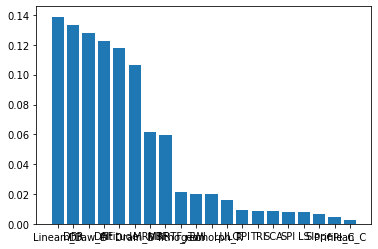

In [28]:
print(feature_importances)
plt.bar(feature_importances.index,feature_importances.iloc[:,-1].values, align='center', alpha = 1)
plt.show()

# predicting unlabled data

In [39]:
unlabeled = pd.read_csv('Data_unlabeled.csv')

x_unl = unlabeled.iloc[: , 2:].values
x_coordinates = unlabeled.iloc[:,:2]
unlabeled.head(10)

,x,y,DFF,DFR,Altitude,Draw_D,Drain_D,LS,Lineam_D,MRVBF,...,SCA,Profile_C,Plan_C,TRI,SPI,Slope,TWI,TPI,litho_recl,geomorph_R
0,258143.343169,2.664110e+06,12.36240,8.60310,541.0,4.33529,0.16722,1.75086,0.0,0.16393,...,17.57359,-0.00098,-0.00084,2.48998,256.40796,0.12944,6.25581,0.64865,2.0,2.0
1,258233.343169,2.664110e+06,12.27924,8.59698,536.0,4.33185,0.16012,0.47551,0.0,1.84461,...,40.00359,-0.00244,-0.02385,1.00000,141.52002,0.03725,7.06296,-1.02703,2.0,2.0
2,258323.343169,2.664110e+06,12.19617,8.59179,535.0,4.32848,0.14855,0.90309,0.0,0.91355,...,36.81416,0.00071,0.00571,1.34164,225.42549,0.06861,7.31022,0.54054,2.0,2.0
3,258413.343169,2.664110e+06,12.11320,8.58755,536.0,4.32518,0.14352,1.06532,0.0,0.36503,...,17.57359,0.00220,0.01238,1.84391,113.97736,0.08951,6.68820,2.24324,2.0,2.0
4,258503.343169,2.664110e+06,12.03034,8.58425,537.0,4.32195,0.13879,0.44645,0.0,0.06206,...,22.16388,0.00089,0.00596,0.77460,36.82467,0.03725,7.46354,1.97297,4.0,2.0
5,258593.343169,2.664110e+06,11.94757,8.58189,530.0,4.31879,0.13477,1.07262,0.0,1.78328,...,45.05311,-0.00603,-0.07360,3.13050,483.79874,0.08314,6.73362,-4.02703,4.0,2.0
6,258683.343169,2.664110e+06,11.86491,8.58047,534.0,4.31569,0.13070,0.69362,0.0,0.05827,...,17.57359,0.00170,0.02702,1.34164,61.00688,0.06002,6.92963,1.56757,4.0,2.0
7,258773.343169,2.664110e+06,11.78236,8.58000,532.0,4.31266,0.12659,0.92361,0.0,0.97943,...,41.95362,-0.00221,-0.00000,1.41421,115.40007,0.06657,6.74746,-0.59459,4.0,2.0
8,258143.343169,2.664200e+06,12.32839,8.51334,535.0,4.32580,0.17574,1.00166,0.0,0.84130,...,187.56355,0.00227,-0.01712,1.48324,521.14337,0.06861,6.75585,0.35135,2.0,2.0
9,258233.343169,2.664200e+06,12.24500,8.50716,534.0,4.32241,0.17108,1.20406,0.0,0.33484,...,85.83942,0.00182,0.00387,1.89737,212.62872,0.09688,6.78160,2.32432,2.0,2.0


In [17]:
print(x_unl[0])

[ 1.24e+01  8.60e+00  5.41e+02  4.34e+00  1.67e-01  1.75e+00  0.00e+00
  1.64e-01  2.06e-01  4.00e+00  1.76e+01 -9.80e-04 -8.40e-04  2.49e+00
  2.56e+02  1.29e-01  6.26e+00  6.49e-01  2.00e+00  2.00e+00]


In [40]:
label = classifier.predict(x_unl)
print(label[0:5])

[1 3 1 1 1]


In [30]:
x_coordinates.head()

,x,y
0,258143.343169,2.664110e+06
1,258233.343169,2.664110e+06
2,258323.343169,2.664110e+06
3,258413.343169,2.664110e+06
4,258503.343169,2.664110e+06


In [21]:
x_coordinates['well_class'] = label

x_coordinates.head()

C:\Users\Bihari\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,x,y,well_class
0,258143.343169,2.664110e+06,1
1,258233.343169,2.664110e+06,2
2,258323.343169,2.664110e+06,2
3,258413.343169,2.664110e+06,2
4,258503.343169,2.664110e+06,4


1    1380047
2     264291
3     210320
4     195965
Name: well_class, dtype: int64


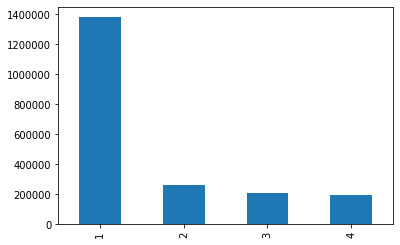

In [34]:
print(pd.value_counts(x_coordinates['well_class']))
pd.value_counts(x_coordinates['well_class']).plot.bar()

In [32]:
#exporting the data
x_coordinates.to_csv('prediction.csv')

# Grid search 

In [ ]:
from sklearn.model_selection import GridSearchCV

est = list(np.arange(1,100,5))
cri = ['gini','entrophy']
mss = list(np.arange(2,100,5))
md = list(np.arange(1,50,5))
msl = list(np.arange(1,30,5))

parameters = [{'n_estimators':est, 'criterion':cri , 'min_samples_split':mss, 'max_depth':md, 'min_samples_leaf':msl}]
#parameters = [{'n_estimators': list(np.arange(1,100,10)), 'criterion': ['gini','entropy'],'max_depth': list(np.arange(1,))}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)